In [2]:
import numpy as np
import pandas as pd
import requests
from io import StringIO

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
def plot_jointplot(data, attr1_name, attr2_name):
    sns.jointplot(data[attr1_name],data[attr2_name])

# Abalone

In [5]:
abalone_req = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data')
abalone = pd.read_csv(StringIO(abalone_req.text), 
                      names=['Sex', 'Length', 'Diameter', 'Height',
                             'Whole Weight', 'Shucked Weight', 'Viscera Weight', 
                             'Shell Weight', 'Rings'])
print(abalone.shape)

(4177, 9)


In [7]:
abalone.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


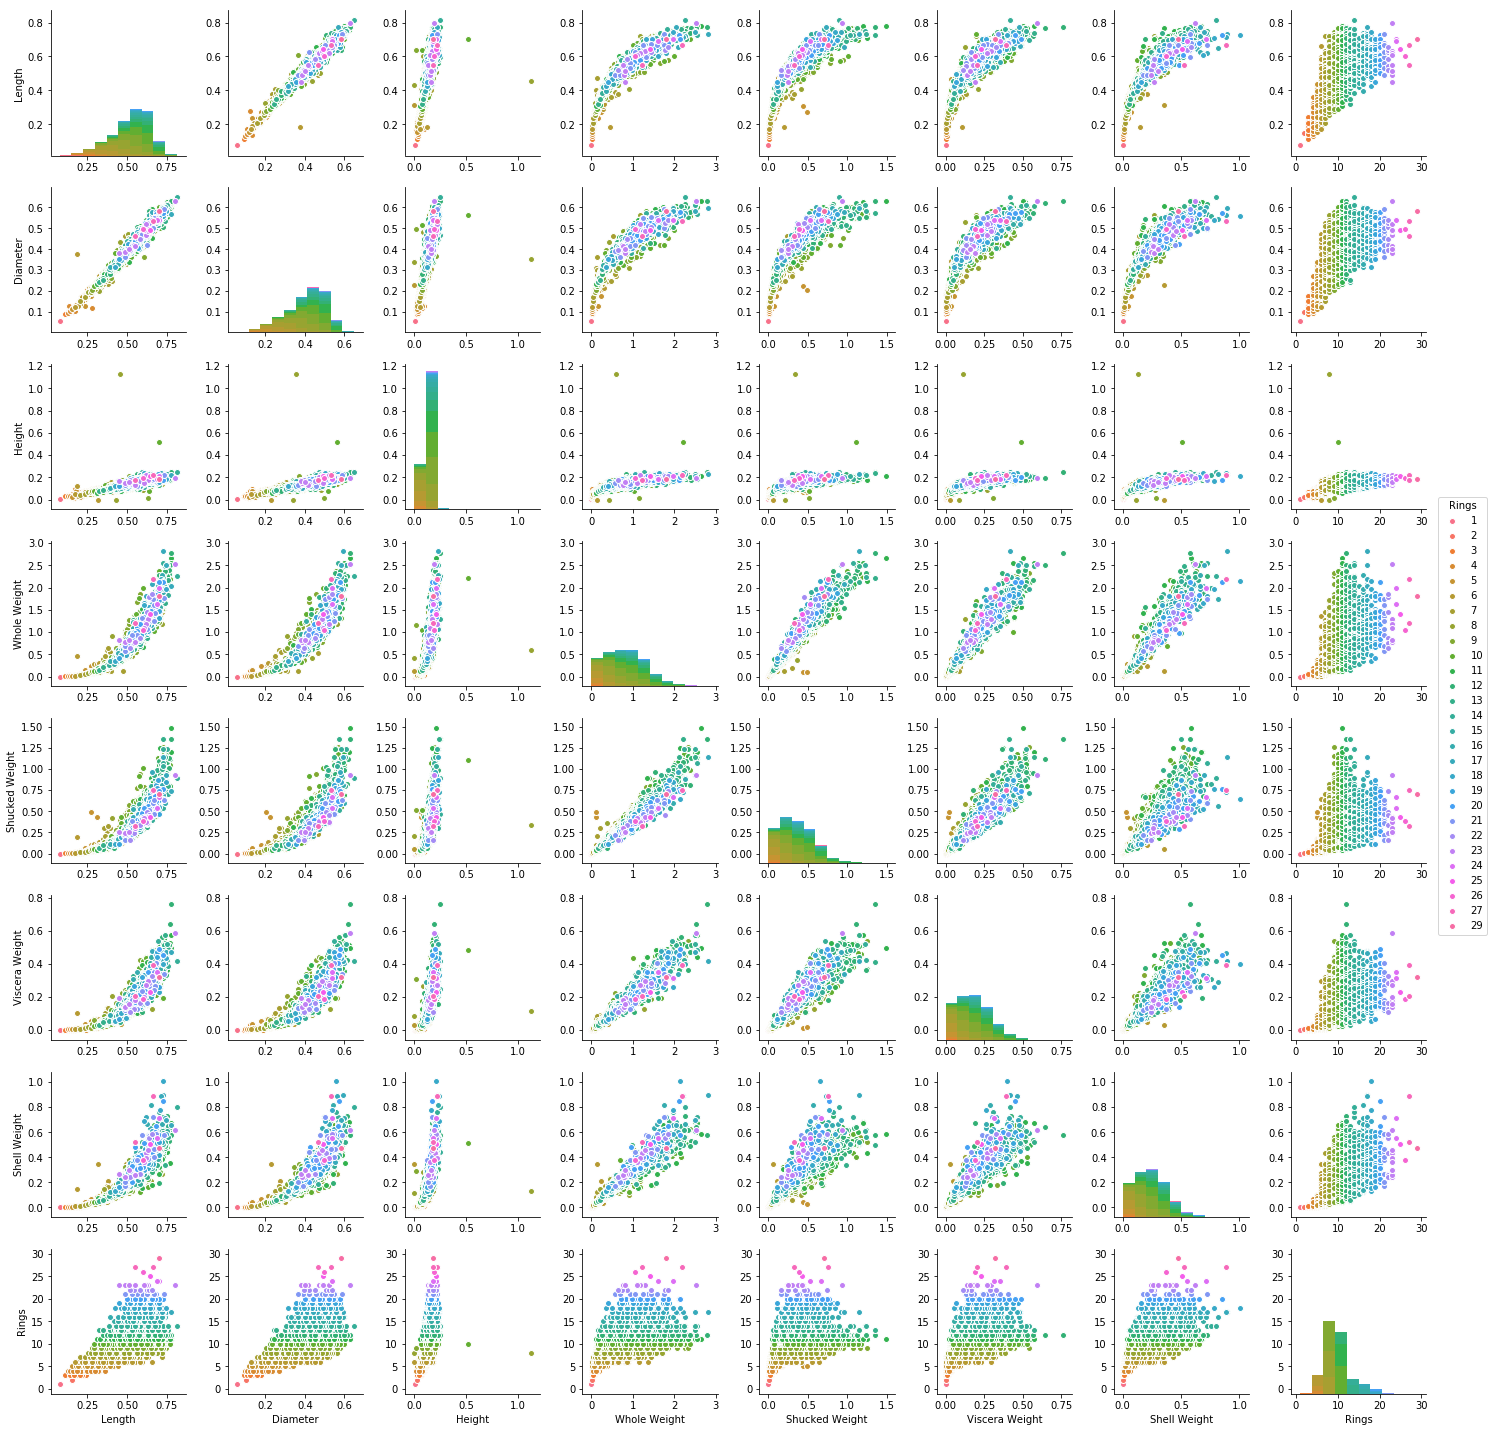

In [6]:
sns.pairplot(abalone, hue='Rings')

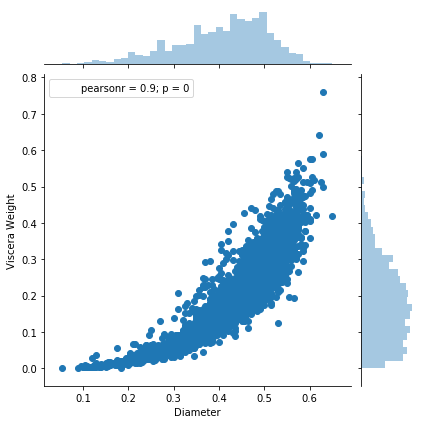

In [7]:
plot_jointplot(abalone, 'Diameter', 'Viscera Weight')
#sns.jointplot(abalone.Diameter, abalone['Viscera Weight'])
#print(abalone.Sex.factorize()[1])
#sns.jointplot(abalone.Sex.factorize()[0],abalone['Height'])

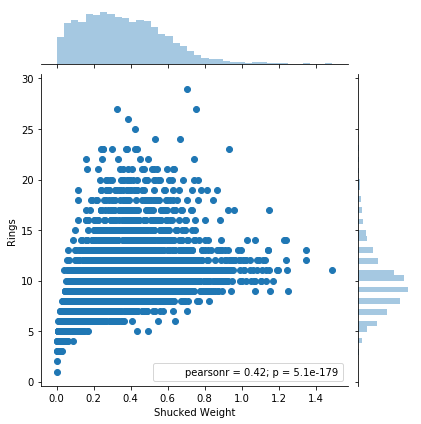

In [13]:
plot_jointplot(abalone, 'Shucked Weight', 'Rings')

In [27]:
abalone.cov()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
Length,0.014422,0.011761,0.004157,0.054491,0.023935,0.011887,0.015007,0.215562
Diameter,0.011761,0.009849,0.003461,0.045038,0.019674,0.009787,0.012507,0.183872
Height,0.004157,0.003461,0.001750,0.016803,0.007195,0.003660,0.004759,0.075179
Whole Weight,0.054491,0.045038,0.016803,0.240481,0.105518,0.051946,0.065216,0.854409
Shucked Weight,0.023935,0.019674,0.007195,0.105518,0.049268,0.022675,0.027271,0.301204
Viscera Weight,0.011887,0.009787,0.003660,0.051946,0.022675,0.012015,0.013850,0.178057
Shell Weight,0.015007,0.012507,0.004759,0.065216,0.027271,0.013850,0.019377,0.281663
Rings,0.215562,0.183872,0.075179,0.854409,0.301204,0.178057,0.281663,10.395266


In [37]:
abalone.corr()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole Weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked Weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera Weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell Weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


# Telescope

In [10]:
telescope_req = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data')
telescope = pd.read_csv(StringIO(telescope_req.text),
                     names=['fLength','fWidth','fSize', 
                            'fConc','fConc1','fAsym',
                            'fM3Long','fM3Trans','fAlpha','fDist',
                            'Class'])
print(telescope.shape)
telescope = telescope.sample(5000)
print(telescope.shape)
telescope.Class = 1-telescope.Class.factorize()[0]

(19020, 11)
(5000, 11)


In [11]:
telescope.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,54.005921,22.525759,2.830415,0.377917,0.213088,-5.144772,10.338307,0.009000,27.542294,195.286812,0.653800
std,43.767039,18.808815,0.477538,0.183545,0.110941,59.489133,52.499997,21.175291,25.983766,74.763773,0.475805
min,8.231100,0.000000,2.014900,0.016200,0.005000,-457.916100,-318.300200,-142.589400,0.000000,1.282600,0.000000
25%,24.299475,11.999525,2.478900,0.231675,0.126000,-21.033325,-12.646675,-11.102325,5.689275,143.792250,0.000000
50%,37.307950,17.145600,2.740000,0.352450,0.195550,3.287050,15.564550,-0.000100,17.697400,193.092500,1.000000
75%,70.462025,25.236575,3.114950,0.501300,0.282150,24.123900,36.978450,10.874500,45.430075,243.397750,1.000000
max,305.422000,172.926000,5.011800,0.878600,0.637000,464.631000,227.817400,179.851000,90.000000,466.407800,1.000000


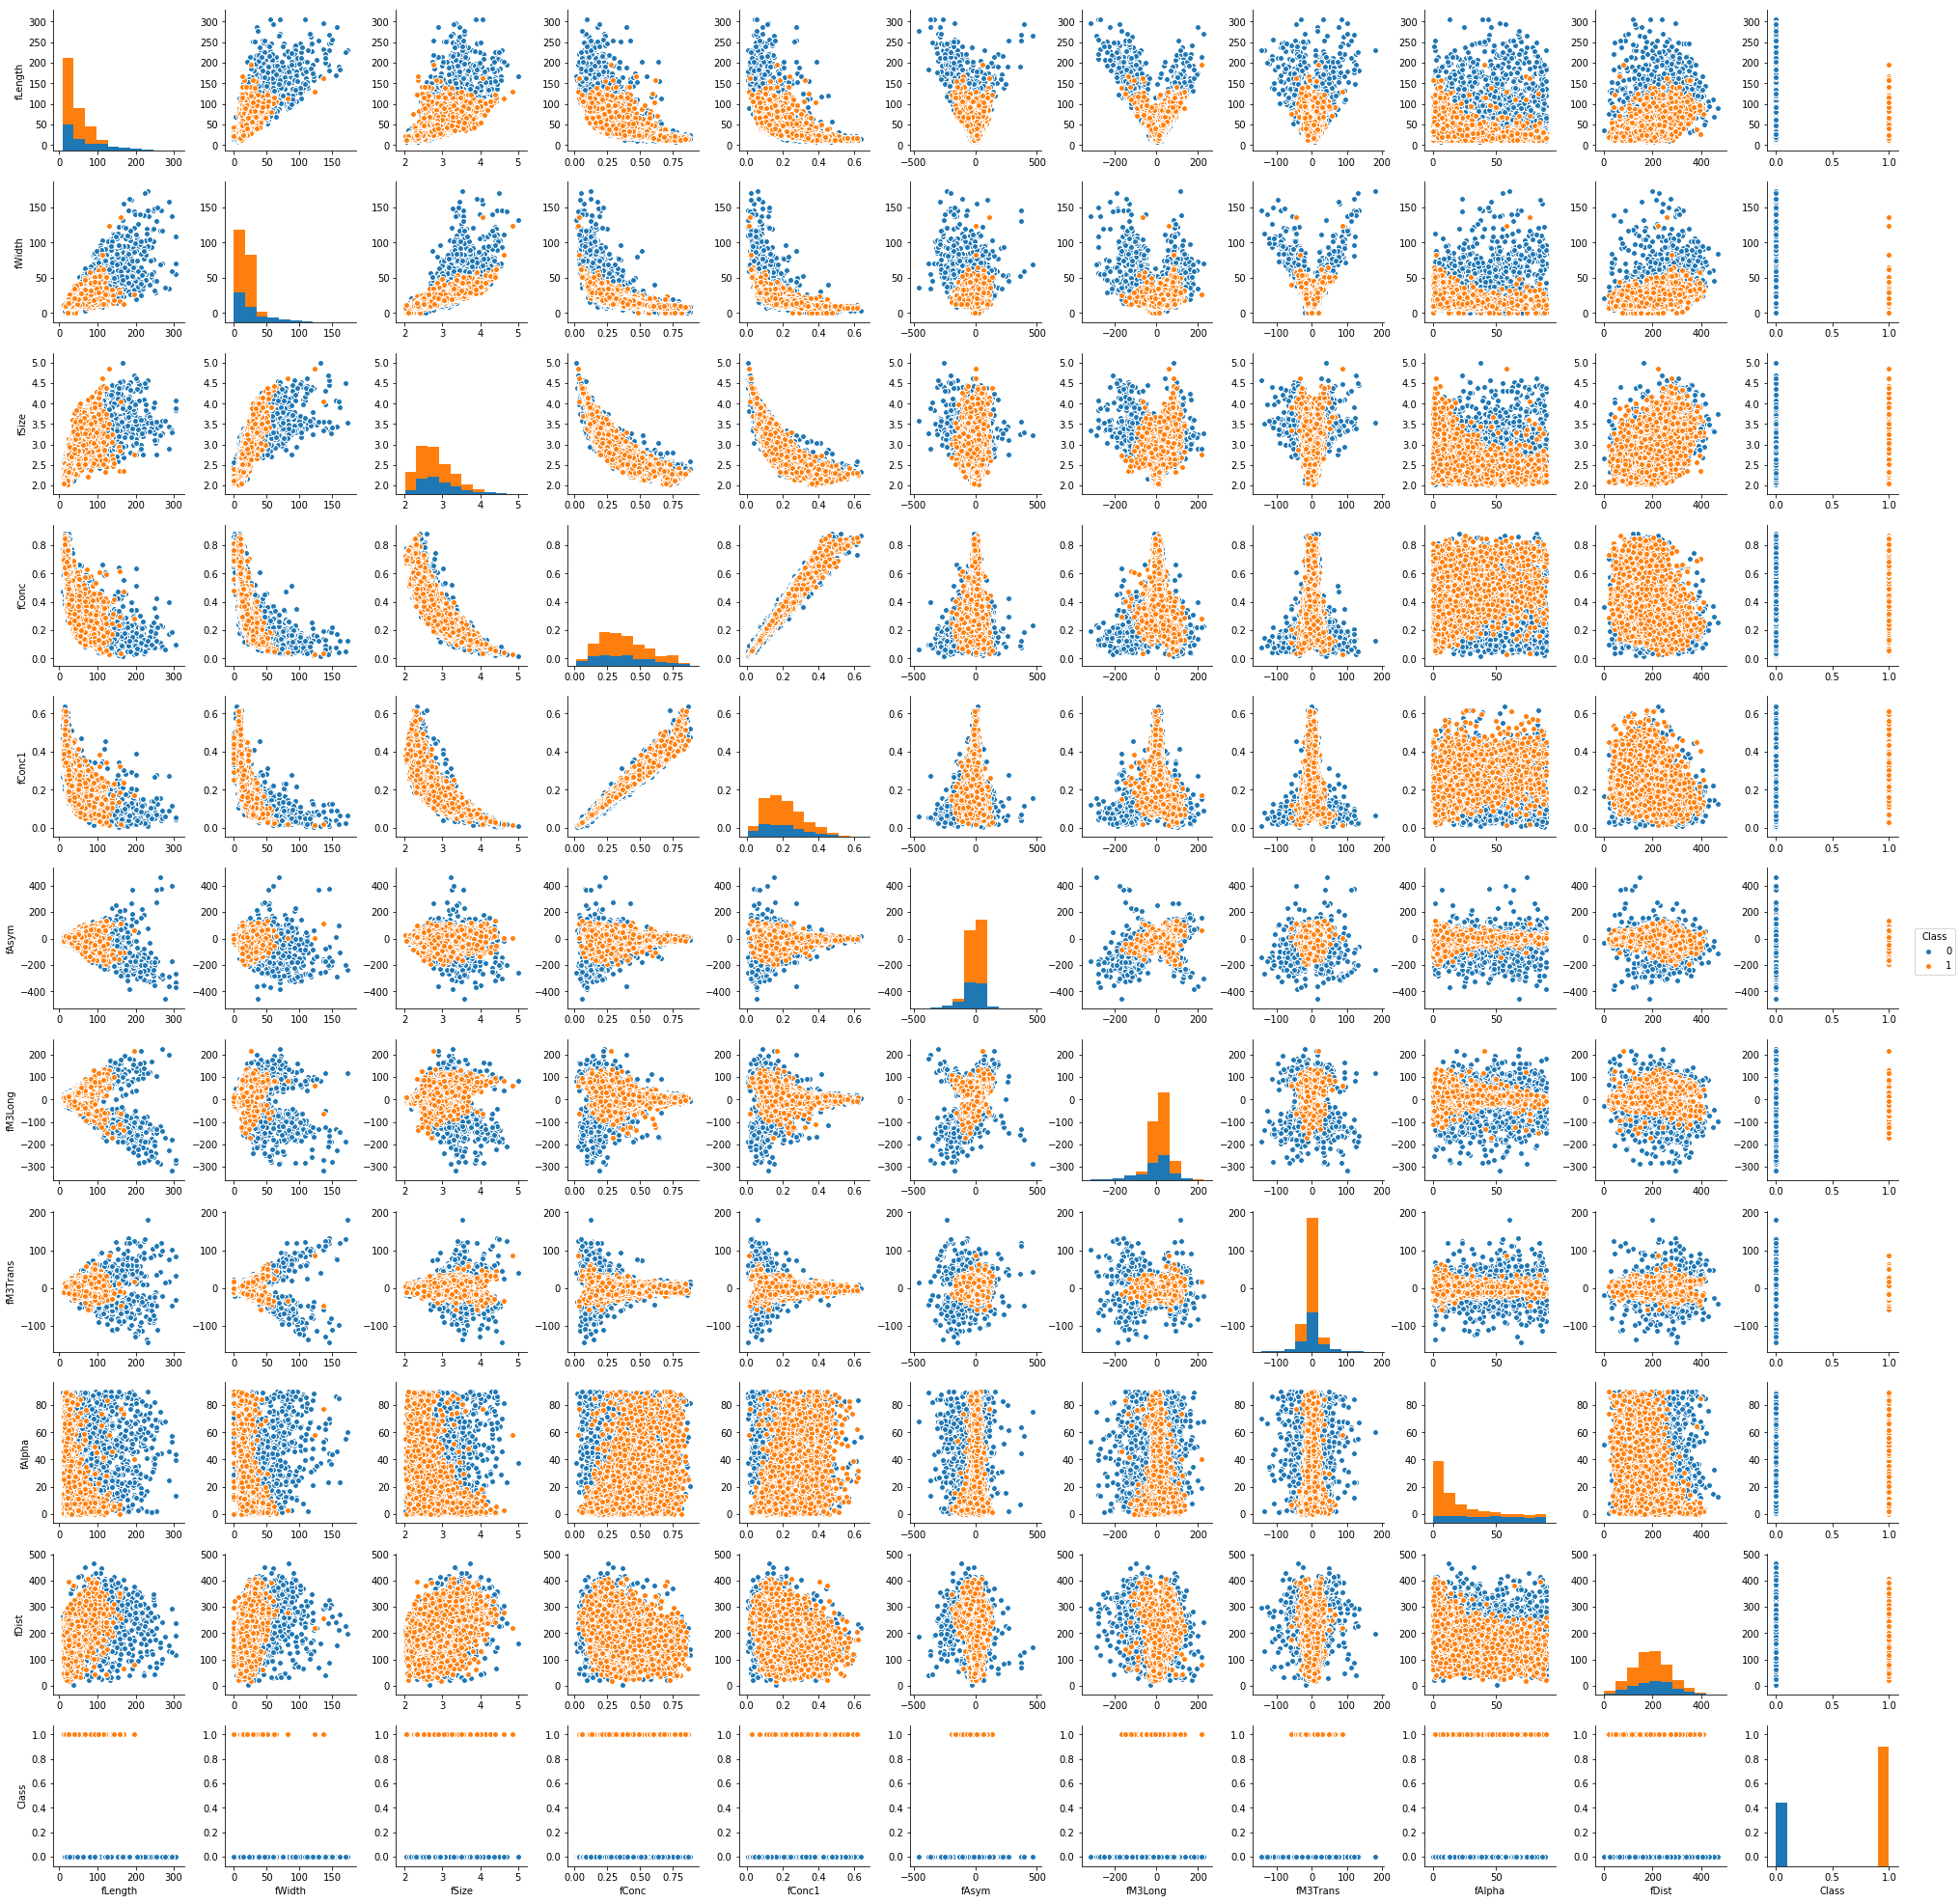

In [12]:
sns.pairplot(telescope, hue='Class')

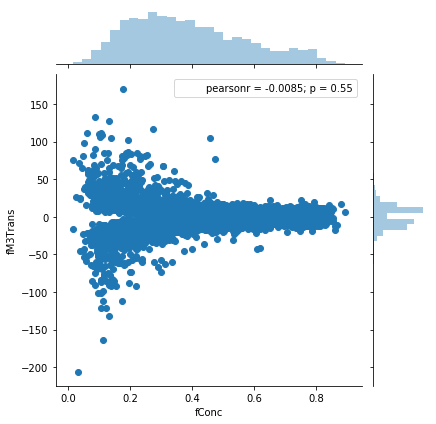

In [24]:
plot_jointplot(telescope, 'fConc', 'fM3Trans')

In [9]:
telescope.corr()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
fLength,1.000000,0.762097,0.694268,-0.625250,-0.589436,-0.346144,-0.054274,0.027767,0.000180,0.407780,0.306943
fWidth,0.762097,1.000000,0.711667,-0.610183,-0.579935,-0.270687,-0.123322,0.062579,0.079026,0.320070,0.254269
fSize,0.694268,0.711667,1.000000,-0.847710,-0.803163,-0.150158,0.136938,0.017132,-0.182591,0.413327,0.111235
fConc,-0.625250,-0.610183,-0.847710,1.000000,0.974831,0.101419,-0.160483,-0.012761,0.226037,-0.312369,-0.023527
fConc1,-0.589436,-0.579935,-0.803163,0.974831,1.000000,0.088266,-0.160803,-0.013194,0.219179,-0.291148,-0.005198
fAsym,-0.346144,-0.270687,-0.150158,0.101419,0.088266,1.000000,0.223003,0.019253,-0.062564,-0.198509,-0.172802
fM3Long,-0.054274,-0.123322,0.136938,-0.160483,-0.160803,0.223003,1.000000,-0.049867,-0.191730,0.055916,-0.167119
fM3Trans,0.027767,0.062579,0.017132,-0.012761,-0.013194,0.019253,-0.049867,1.000000,0.043235,-0.002785,0.025086
fAlpha,0.000180,0.079026,-0.182591,0.226037,0.219179,-0.062564,-0.191730,0.043235,1.000000,-0.229847,0.467830
fDist,0.407780,0.320070,0.413327,-0.312369,-0.291148,-0.198509,0.055916,-0.002785,-0.229847,1.000000,0.051248


In [26]:
telescope.cov()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
fLength,1762.104706,581.871632,13.591316,-4.847430,-2.796601,-829.172099,-243.363008,27.007723,-37.636849,1293.502856,6.150759
fWidth,581.871632,313.501218,5.815857,-1.987000,-1.144686,-247.471530,-167.443136,13.078585,13.733258,456.211326,2.161312
fSize,13.591316,5.815857,0.215992,-0.072790,-0.041874,-3.869003,2.571318,0.224924,-2.641384,15.256807,0.024979
fConc,-4.847430,-1.987000,-0.072790,0.033991,0.020115,1.094937,-1.187800,-0.031775,1.297444,-4.596650,-0.001240
fConc1,-2.796601,-1.144686,-0.041874,0.020115,0.012498,0.595374,-0.705737,-0.020173,0.772601,-2.592633,0.000298
fAsym,-829.172099,-247.471530,-3.869003,1.094937,0.595374,3314.209471,800.132849,-0.971756,-73.642104,-949.473080,-4.592409
fM3Long,-243.363008,-167.443136,2.571318,-1.187800,-0.705737,800.132849,2550.600552,-48.845114,-240.999289,139.794236,-4.493160
fM3Trans,27.007723,13.078585,0.224924,-0.031775,-0.020173,-0.971756,-48.845114,414.818903,6.880621,59.206625,0.209083
fAlpha,-37.636849,13.733258,-2.641384,1.297444,0.772601,-73.642104,-240.999289,6.880621,680.231247,-457.985855,5.516576
fDist,1293.502856,456.211326,15.256807,-4.596650,-2.592633,-949.473080,139.794236,59.206625,-457.985855,5516.196514,2.178289


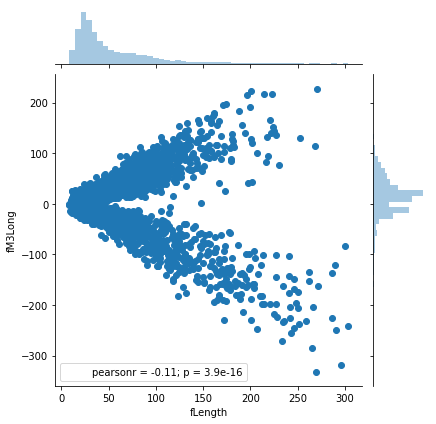

In [30]:
plot_jointplot(telescope, 'fLength','fM3Long')